In [5]:
import sklearn
import pandas as pd

In [13]:
df = pd.read_csv('Datasets/WH1_GPO.csv')

set df_actual as df without the first row

In [ ]:
#variables
download_date = 2023-03-03
supplier = 'WH1'


In [20]:
#remove the column values and set row 0 as column names
df_actual = df.iloc[1:]
df_actual.columns = df.iloc[0]
df_actual

,SVC Purchase Decision,Ordering Notes,Supplier Code,SVC Notes1,SVC Notes2,SVC Outstanding Qty,SVC ToOrder Target,SVC Inventory Level,Supplier Stock Level,Supplier Backorder ETA,...,AMZN BB % Winner 0_3,BSR Drops 30D,BSR Drops 90D,BSR Drops 180D,SVC BSR Drops Velocity Estimate WMA 7_360,Is Redirected ASIN,Price Stability,Cost prep in Amazon,Cost prep SL in Amazon,Barcode instruction
1,NaN,NaN,WH1,NaN,NaN,3,1,1,"99,999",NaN,...,0%,1,1,6,0.27,NaN,Stable,NaN,NaN,MustProvideSellerSKU
2,NaN,NaN,WH1,NaN,NaN,0,9,0,"99,999",NaN,...,0%,61,171,368,30.2,NaN,Stable,$0.70,$0.70,MustProvideSellerSKU
3,NaN,NaN,WH1,NaN,NaN,0,1,0,"99,999",NaN,...,0%,0,0,3,0.07,NaN,Stable,NaN,NaN,RequiresFNSKULabel
4,NaN,NaN,WH1,NaN,NaN,0,4,0,"99,999",NaN,...,0%,3,4,8,0.33,NaN,Stable,NaN,NaN,MustProvideSellerSKU
5,NaN,NaN,WH1,NaN,NaN,0,7,0,"99,999",NaN,...,0%,1,8,29,1.05,NaN,Stable,NaN,NaN,MustProvideSellerSKU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,NaN,NaN,WH1,NaN,NaN,0,223,0,"99,999",NaN,...,0%,NaN,NaN,NaN,NaN,NaN,Stable,NaN,NaN,MustProvideSellerSKU
845,NaN,NaN,WH1,NaN,NaN,0,2,NaN,"99,999",NaN,...,0%,NaN,NaN,NaN,NaN,NaN,Stable,NaN,NaN,MustProvideSellerSKU
846,NaN,NaN,WH1,NaN,NaN,0,0,NaN,"99,999",NaN,...,100%,49,152,328,17.23,NaN,Stable,NaN,NaN,MustProvideSellerSKU
847,NaN,NaN,WH1,NaN,NaN,0,0,NaN,"99,999",NaN,...,100%,18,53,107,2.5,NaN,Stable,NaN,NaN,MustProvideSellerSKU


In [33]:
#Select columns --> 'SVC Formula SKU Multiplier','SVC Target AMZN Qty (pks)'

cols = ['SVC Formula SKU Multiplier','SVC Target AMZN Qty (pks)']
#select the cols
df_actual = df_actual[cols]
df_actual


,SVC Formula SKU Multiplier,SVC Target AMZN Qty (pks)
1,2.39,0.0
2,1.99,22.0
3,1.52,2.0
4,1.50,14.0
5,1.50,24.0
...,...,...
844,0.00,0.0
845,0.00,0.0
846,0.00,0.0
847,0.00,0.0


In [26]:
#convert to float
df_actual = df_actual.astype(float)

In [40]:
#remove all rows with 0
for col in cols:
    df_actual = df_actual[df_actual[col] != 0]
df_actual

,SVC Formula SKU Multiplier,SVC Target AMZN Qty (pks)
2,1.99,22.0
3,1.52,2.0
4,1.50,14.0
5,1.50,24.0
7,1.50,14.0
...,...,...
346,0.03,1.0
347,0.03,1.0
350,0.02,1.0
352,0.02,1.0


In [41]:
#use sklearn to plot the data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


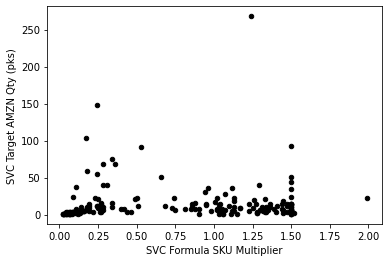

In [45]:
plot = df_actual.plot.scatter(x='SVC Formula SKU Multiplier', y='SVC Target AMZN Qty (pks)', c='Black')

In [46]:
#find assosiated clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_actual)
y_kmeans = kmeans.predict(df_actual)


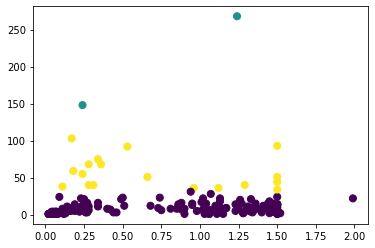

In [47]:
#plot the clusters
plt.scatter(df_actual['SVC Formula SKU Multiplier'], df_actual['SVC Target AMZN Qty (pks)'], c=y_kmeans, s=50, cmap='viridis')

In [48]:
#plot the centroids

In [49]:
centers = kmeans.cluster_centers_

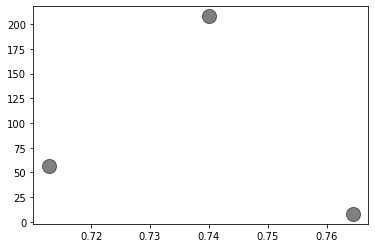

In [50]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);